# Importing Necessary Libraries

Let's start by importing the required libraries for data manipulation, analysis, and visualization.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers_df = pd.read_csv('/content/Customers.csv')
products_df = pd.read_csv('/content/Products.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')


# Checking for Missing Values and Data Types

We'll check for missing values and understand the data types in each dataset.


In [12]:
# Checking for missing values and data types in the Customers dataset
print("Customers Data Information:")
customers_df.info()
print("\nMissing Values in Customers Data:")
print(customers_df.isnull().sum())

# Checking for missing values and data types in the Products dataset
print("\nProducts Data Information:")
products_df.info()
print("\nMissing Values in Products Data:")
print(products_df.isnull().sum())

# Checking for missing values and data types in the Transactions dataset
print("\nTransactions Data Information:")
transactions_df.info()
print("\nMissing Values in Transactions Data:")
print(transactions_df.isnull().sum())


Customers Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB

Missing Values in Customers Data:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB

Missing Values in Pr

# Displaying Descriptive Statistics

Let's now display summary statistics for the datasets to understand their structure better.


In [13]:
# Display summary statistics for each dataset
print("\nCustomers Data - Summary Statistics:")
display(customers_df.describe(include='all'))

print("\nProducts Data - Summary Statistics:")
display(products_df.describe(include='all'))

print("\nTransactions Data - Summary Statistics:")
display(transactions_df.describe(include='all'))



Customers Data - Summary Statistics:


,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3



Products Data - Summary Statistics:


,ProductID,ProductName,Category,Price
count,100,100,100,100.000000
unique,100,66,4,NaN
top,P001,ActiveWear Smartwatch,Books,NaN
freq,1,4,26,NaN
mean,NaN,NaN,NaN,267.551700
std,NaN,NaN,NaN,143.219383
min,NaN,NaN,NaN,16.080000
25%,NaN,NaN,NaN,147.767500
50%,NaN,NaN,NaN,292.875000
75%,NaN,NaN,NaN,397.090000



Transactions Data - Summary Statistics:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000
unique,1000,199,100,1000,NaN,NaN,NaN
top,T00001,C0109,P059,2024-08-25 12:38:23,NaN,NaN,NaN
freq,1,11,19,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.537000,689.995560,272.55407
std,NaN,NaN,NaN,NaN,1.117981,493.144478,140.73639
min,NaN,NaN,NaN,NaN,1.000000,16.080000,16.08000
25%,NaN,NaN,NaN,NaN,2.000000,295.295000,147.95000
50%,NaN,NaN,NaN,NaN,3.000000,588.880000,299.93000
75%,NaN,NaN,NaN,NaN,4.000000,1011.660000,404.40000


# Initial Insights

Here, we'll derive some key insights from the data based on unique values, date ranges, and some basic statistics.


In [14]:
# Unique counts for customers, products, and transactions
print("\nUnique Customers:", customers_df['CustomerID'].nunique())
print("Unique Products:", products_df['ProductID'].nunique())
print("Unique Transactions:", transactions_df['TransactionID'].nunique())

# Analyzing signup and transaction dates
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

print("\nSignup Date Range:", customers_df['SignupDate'].min(), "to", customers_df['SignupDate'].max())
print("Transaction Date Range:", transactions_df['TransactionDate'].min(), "to", transactions_df['TransactionDate'].max())

# Distribution of Regions and Product Categories
print("\nRegion Distribution:")
display(customers_df['Region'].value_counts())

print("\nProduct Category Distribution:")
display(products_df['Category'].value_counts())

# Total sales and revenue
total_sales = transactions_df['Quantity'].sum()
total_revenue = transactions_df['TotalValue'].sum()

print(f"\nTotal Sales: {total_sales} units")
print(f"Total Revenue: ${total_revenue:.2f}")



Unique Customers: 200
Unique Products: 100
Unique Transactions: 1000

Signup Date Range: 2022-01-22 00:00:00 to 2024-12-28 00:00:00
Transaction Date Range: 2023-12-30 15:29:12 to 2024-12-28 11:00:00

Region Distribution:


,count
Region,
South America,59
Europe,50
North America,46
Asia,45



Product Category Distribution:


,count
Category,
Books,26
Electronics,26
Clothing,25
Home Decor,23



Total Sales: 2537 units
Total Revenue: $689995.56


# Data Visualizations

Next, we will visualize the data to get more detailed insights.


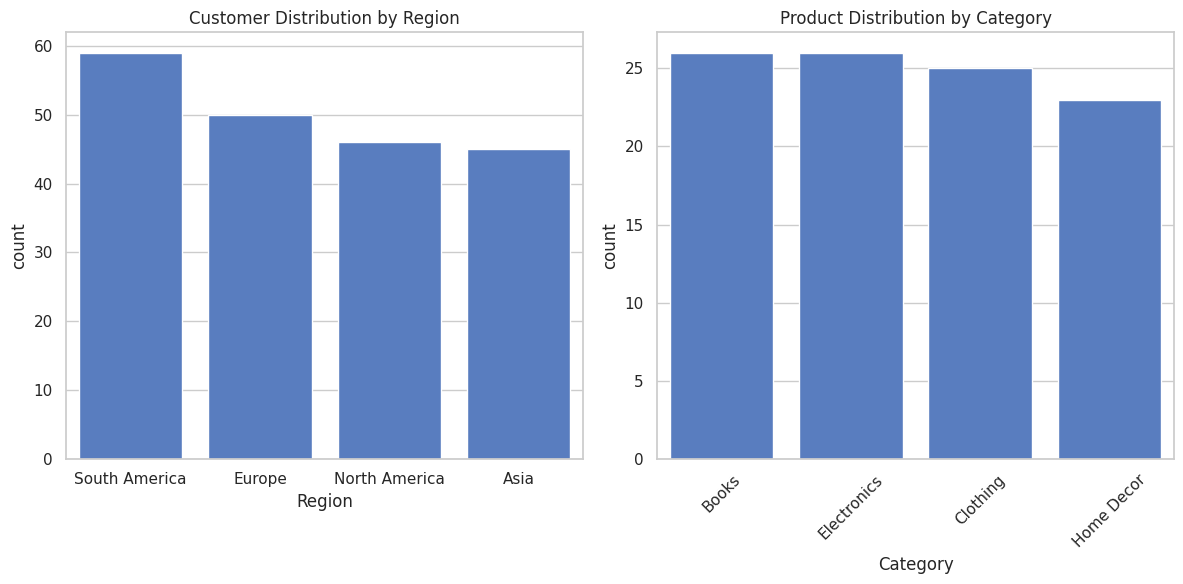

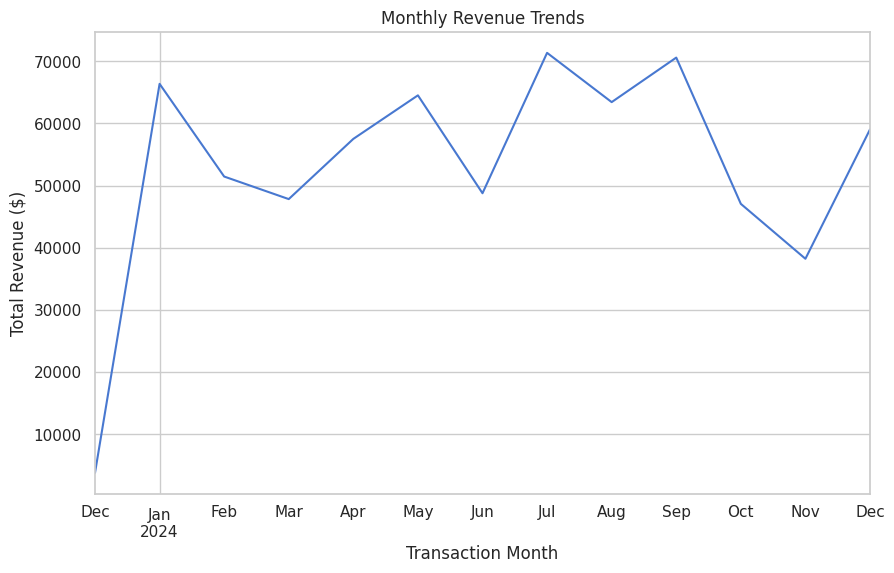

In [15]:
# Visualization setup
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(12, 6))

# Region distribution
plt.subplot(1, 2, 1)
sns.countplot(data=customers_df, x='Region', order=customers_df['Region'].value_counts().index)
plt.title("Customer Distribution by Region")

# Product category distribution
plt.subplot(1, 2, 2)
sns.countplot(data=products_df, x='Category', order=products_df['Category'].value_counts().index)
plt.title("Product Distribution by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sales trends over time
plt.figure(figsize=(10, 6))
transactions_df.groupby(transactions_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum().plot(kind='line')
plt.title("Monthly Revenue Trends")
plt.xlabel("Transaction Month")
plt.ylabel("Total Revenue ($)")
plt.grid(True)
plt.show()


# Revenue by Region

We'll now analyze the total revenue generated by customers from different regions.


<ipython-input-16-f895cc71e17f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalValue', y='Region', data=region_revenue_by_region, palette="Blues_d")


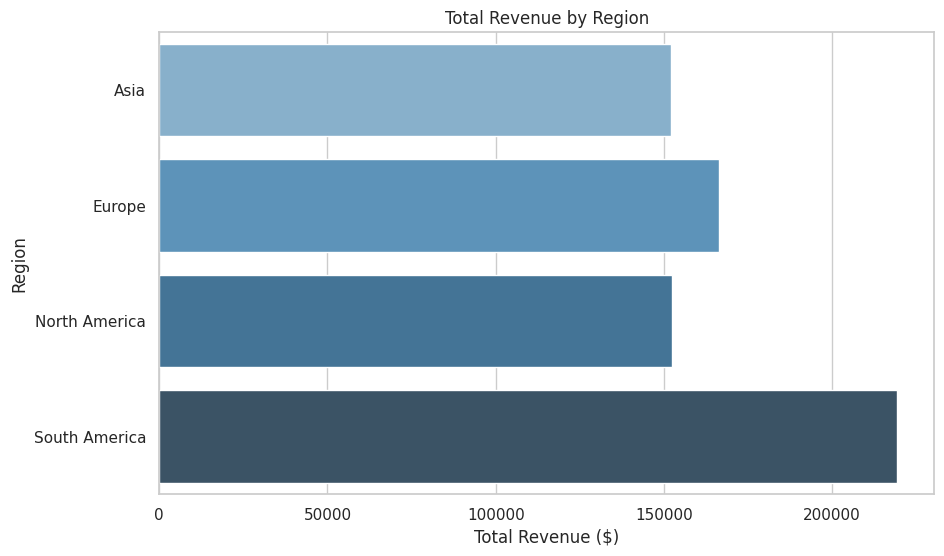

          Region  TotalValue
0           Asia   152074.97
1         Europe   166254.63
2  North America   152313.40
3  South America   219352.56


In [16]:
# Calculate revenue by region
region_revenue = transactions_df.groupby('CustomerID').agg({'TotalValue': 'sum'}).reset_index()
region_revenue = pd.merge(region_revenue, customers_df[['CustomerID', 'Region']], on='CustomerID', how='left')

# Revenue by region
region_revenue_by_region = region_revenue.groupby('Region').agg({'TotalValue': 'sum'}).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalValue', y='Region', data=region_revenue_by_region, palette="Blues_d")
plt.title("Total Revenue by Region")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Region")
plt.show()

# Display revenue by region
print(region_revenue_by_region)


# Revenue by Product

Let's now analyze revenue by product and identify the top-selling products.


<ipython-input-17-be751cfd844f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalValue', y='ProductName', data=top_products, palette="Greens_d")


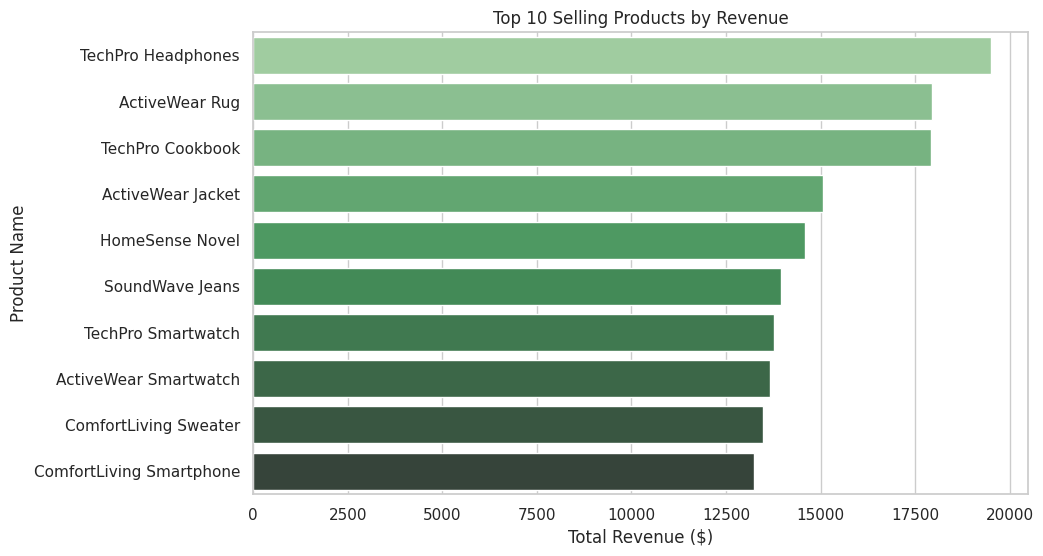

   ProductID  TotalValue               ProductName
28      P029    19513.80        TechPro Headphones
78      P079    17946.91            ActiveWear Rug
47      P048    17905.20          TechPro Cookbook
19      P020    15060.92         ActiveWear Jacket
61      P062    14592.24           HomeSense Novel
58      P059    13947.20           SoundWave Jeans
38      P039    13778.88        TechPro Smartwatch
82      P083    13671.60     ActiveWear Smartwatch
18      P019    13487.95     ComfortLiving Sweater
40      P041    13232.12  ComfortLiving Smartphone


In [17]:
# Calculate revenue by product
product_revenue = transactions_df.groupby('ProductID').agg({'TotalValue': 'sum'}).reset_index()
product_revenue = pd.merge(product_revenue, products_df[['ProductID', 'ProductName']], on='ProductID', how='left')

# Top 10 selling products by revenue
top_products = product_revenue.sort_values('TotalValue', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalValue', y='ProductName', data=top_products, palette="Greens_d")
plt.title("Top 10 Selling Products by Revenue")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Product Name")
plt.show()

# Display top selling products
print(top_products)


# Signup Date Analysis

This analysis will focus on trends related to customer signups over time.


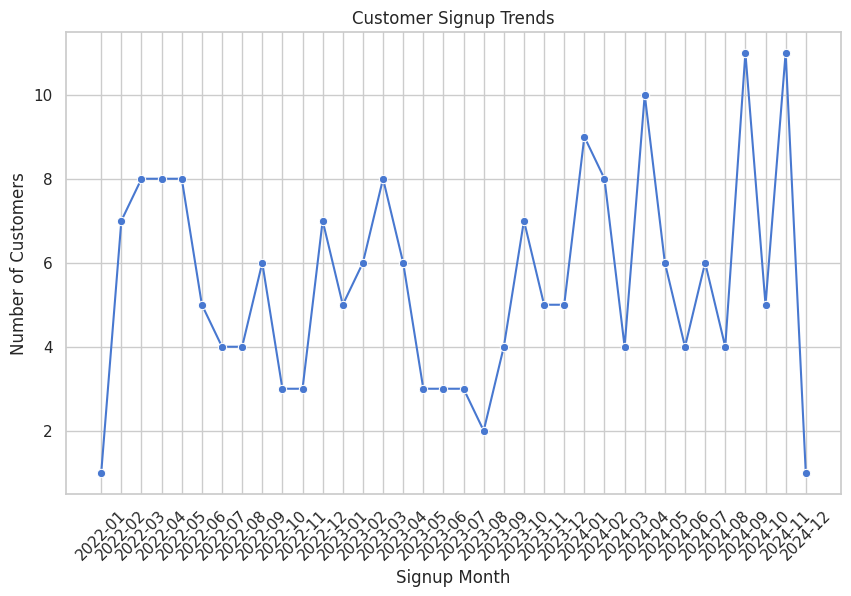

   SignupMonth  CustomerCount
0      2022-01              1
1      2022-02              7
2      2022-03              8
3      2022-04              8
4      2022-05              8
5      2022-06              5
6      2022-07              4
7      2022-08              4
8      2022-09              6
9      2022-10              3
10     2022-11              3
11     2022-12              7
12     2023-01              5
13     2023-02              6
14     2023-03              8
15     2023-04              6
16     2023-05              3
17     2023-06              3
18     2023-07              3
19     2023-08              2
20     2023-09              4
21     2023-10              7
22     2023-11              5
23     2023-12              5
24     2024-01              9
25     2024-02              8
26     2024-03              4
27     2024-04             10
28     2024-05              6
29     2024-06              4
30     2024-07              6
31     2024-08              4
32     202

In [18]:
# Signup date distribution
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customers_df['SignupMonth'] = customers_df['SignupDate'].dt.to_period('M')

# Count signups by month
signup_trends = customers_df.groupby('SignupMonth').size().reset_index(name='CustomerCount')

# Convert 'SignupMonth' to string before plotting
signup_trends['SignupMonth'] = signup_trends['SignupMonth'].astype(str)

# Plot signup trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='SignupMonth', y='CustomerCount', data=signup_trends, marker='o')
plt.title("Customer Signup Trends")
plt.xlabel("Signup Month")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

# Display signup trends
print(signup_trends)


# Product Category Analysis

We'll now analyze the revenue generated by different product categories.


<ipython-input-19-bf58b42e253a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalValue', y='Category', data=category_revenue, palette="coolwarm")


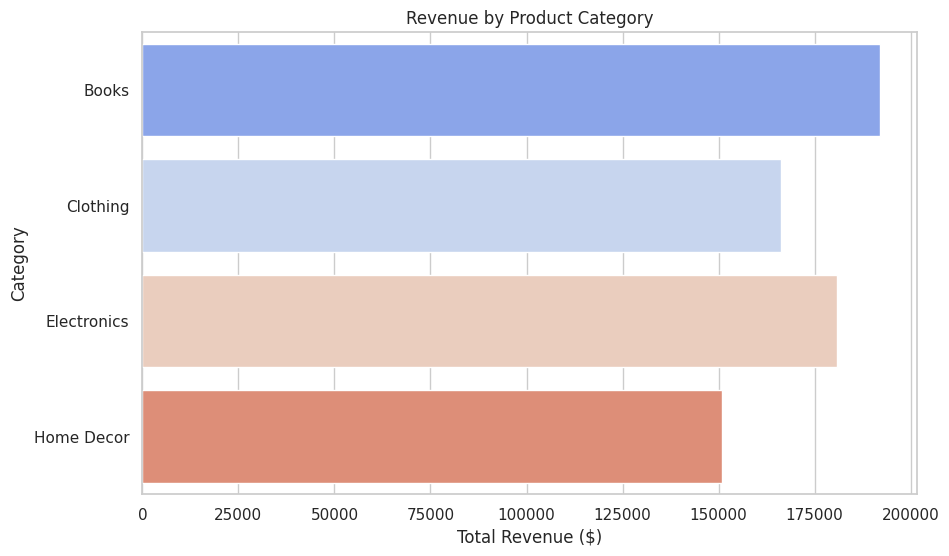

      Category  TotalValue
0        Books   192147.47
1     Clothing   166170.66
2  Electronics   180783.50
3   Home Decor   150893.93


In [19]:
# Calculate total revenue by product category
category_revenue = pd.merge(transactions_df, products_df[['ProductID', 'Category']], on='ProductID', how='left')
category_revenue = category_revenue.groupby('Category').agg({'TotalValue': 'sum'}).reset_index()

# Plot category revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalValue', y='Category', data=category_revenue, palette="coolwarm")
plt.title("Revenue by Product Category")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Category")
plt.show()

# Display revenue by category
print(category_revenue)


# Analyzing Transaction Trends

Finally, let's look at the transaction trends over time.


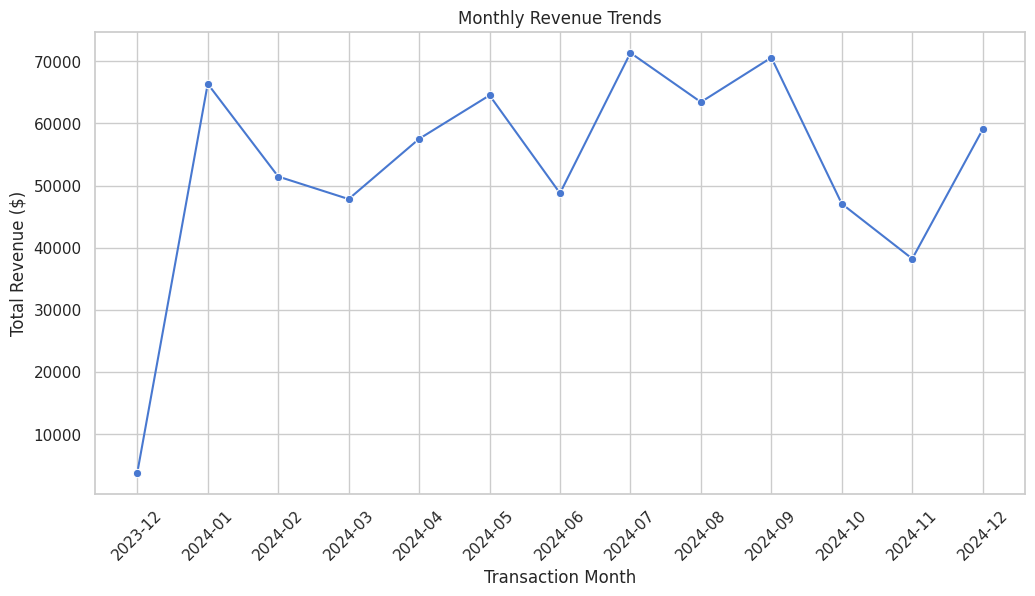

      Month  TotalValue
0   2023-12     3769.52
1   2024-01    66376.39
2   2024-02    51459.27
3   2024-03    47828.73
4   2024-04    57519.06
5   2024-05    64527.74
6   2024-06    48771.18
7   2024-07    71366.39
8   2024-08    63436.74
9   2024-09    70603.75
10  2024-10    47063.22
11  2024-11    38224.37
12  2024-12    59049.20


In [20]:
# Add month and year to transactions data for monthly analysis
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
transactions_df['Month'] = transactions_df['TransactionDate'].dt.to_period('M')

# Calculate monthly revenue
monthly_revenue = transactions_df.groupby('Month').agg({'TotalValue': 'sum'}).reset_index()

# Convert 'Month' column to string before plotting
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str) # Convert Period objects to strings

# Plot monthly revenue trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='TotalValue', data=monthly_revenue, marker='o')
plt.title("Monthly Revenue Trends")
plt.xlabel("Transaction Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.show()

# Display monthly revenue
print(monthly_revenue)
